# Pandas Dataframes

Author: Mike Wood

Learning Objectives: By the end of this notebook, you should be able to:
1. Read data into a Pandas dataframe
2. Edit a dataframe with new columns
3. Subset a dataframe with query parameters
4. Plot data contained in a dataframe

The `pandas` package is a popular package in data science because it allows for convenient, dictionary-like access to labeled data. In this notebook, we will use a `pandas` dataframe  - the key organizational structure introduced by this library - to investigate the S&P 500 Index.

#### Import the libraries for this notebook

In [1]:
# import the pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Importing data into a dataframe

The pandas library provides us with a convenient way to read in data from a csv using the `read_csv` function:

In [2]:
# define the file name
file_name = 'SP500_Index_Long.csv'

# read in the data to a dataframe
df = pd.read_csv(file_name)

# print the first 5 rows of the dataframe
df.head()

,Date,Index
0,1927-12-30,17.660000
1,1928-1-3,17.760000
2,1928-1-4,17.719999
3,1928-1-5,17.549999
4,1928-1-6,17.660000


Each column in a dataframe has a given type:

In [3]:
# check the types of the columns
df.dtypes

Date      object
Index    float64
dtype: object

As we can see above, variables types are automaticlly assigned to each column in the dataframe. We notice that the Date column was assigned a generic "object" type. However, we want to interpret these numbers as actual dates and `pandas` provides a conventient way to deal with this type of data in the form of "datetimes". Let's conver the Date column now:

In [4]:
# convert the dates to dates
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

The Date column looks similar to above:

In [5]:
df.head()

,Date,Index
0,1927-12-30,17.660000
1,1928-01-03,17.760000
2,1928-01-04,17.719999
3,1928-01-05,17.549999
4,1928-01-06,17.660000


However, the types are different:

In [6]:
df.dtypes

Date     datetime64[ns]
Index           float64
dtype: object

This datetime type is important because it allows us to plot the data - something which would be impossible with the dates stores as objects (strings). The following plot uses code introduced in the previous `numpy` notebook [HERE](https://profmikewood.github.io/intro_to_python_book/data_analysis/timeseries_with_numpy.html#make-a-plot-of-the-data) but modified to use the variables in the dataframe:

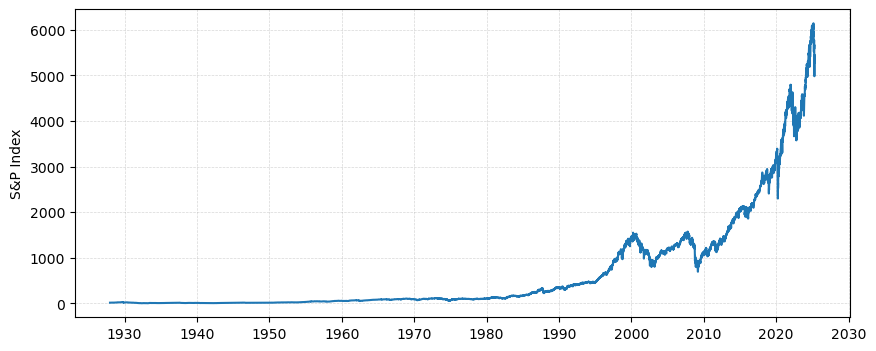

In [7]:
# make a new figure object
fig = plt.figure(figsize = (10,4))

# plot the timeseries
plt.plot(df['Date'], df['Index'])

# add labels to the y axis
plt.ylabel('S&P Index')

# add gridlines
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

# format the axis to only print every other year
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))

# show the plot
plt.show()

## Adding a New Column to a Dataframe

In the dataframe above, we have two columns - one for the date and one for the index. What if we wanted to add more information to our dataframe. For example, what if we wanted to compare the S&P 500 Index to the president in office at the time? Let's add a new column in our dataframe for the president.

Add a new column is easy - it's just like adding a new entry to a dictionary. Let's add a new column for president and then fill it with the string "None" (we'll update this in a second):

In [8]:
df['President'] = 'None'

The list of presidents in the U.S. during the time period that the S&P 500 has existed are as follows:

| Inaguration Date | President |
|------------------|-----------|
| 3/4/1925	| Calvin Coolidge|
| 3/4/1929 | Herbert Hoover | 
| 3/4/1933 | Franklin D. Roosevelt |
| 1/20/1937 | Franklin D. Roosevelt |
| 1/20/1941 | Franklin D. Roosevelt |
| 1/20/1945 | Franklin D. Roosevelt |
| 4/12/1945 | Harry S. Truman |
| 1/20/1949 | Harry S. Truman |
| 1/20/1953 | Dwight D. Eisenhower |
| 1/21/1957 | Dwight D. Eisenhower |
| 1/20/1961 | John F. Kennedy | 
| 11/22/1963 | Lyndon B. Johnson |
| 1/20/1965 | Lyndon B. Johnson |
| 1/20/1969 | Richard M. Nixon  |
| 1/20/1973 | Richard M. Nixon  |
| 8/9/1974  | Gerald R. Ford    |
| 1/20/1977 | Jimmy Carter      |
| 1/20/1981 | Ronald Reagan     |
| 1/21/1985 | Ronald Reagan     |
| 1/20/1989 | George H. W. Bush       |
| 1/20/1993 | Bill Clinton      |
| 1/20/1997 | Bill Clinton      |
| 1/20/2001	| George W. Bush    |
| 1/20/2005	| George W. Bush    |
| 1/20/2009 | Barack Obama		|
| 1/21/2013	| Barack Obama		|
| 1/20/2017 | Donald Trump		|		
| 1/20/2021 | Joe Biden	        |
| 1/20/2025 | Donald Trump      |

We can add all of these dates to big dictionary as follows:

In [10]:
term_dates = {(pd.Timestamp("1925-03-04"),pd.Timestamp("1929-03-03")):'Calvin Coolidge 1',
              (pd.Timestamp("1929-03-04"),pd.Timestamp("1933-03-03")):'Herbert Hoover 1',
              (pd.Timestamp("1933-03-04"),pd.Timestamp("1937-01-19")):'Franklin Roosevelt 1',
              (pd.Timestamp("1937-01-20"),pd.Timestamp("1941-01-19")):'Franklin Roosevelt 2',
              (pd.Timestamp("1941-01-20"),pd.Timestamp("1945-01-19")):'Franklin Roosevelt 3',
              (pd.Timestamp("1945-01-20"),pd.Timestamp("1945-04-11")):'Franklin Roosevelt 4',
              (pd.Timestamp("1945-04-12"),pd.Timestamp("1949-01-19")):'Harry Truman 1',
              (pd.Timestamp("1949-01-20"),pd.Timestamp("1953-01-19")):'Harry Truman 2',
              (pd.Timestamp("1953-01-20"),pd.Timestamp("1957-01-20")):'Dwight Eisenhower 1',
              (pd.Timestamp("1957-01-20"),pd.Timestamp("1961-01-19")):'Dwight Eisenhower 2',
              (pd.Timestamp("1961-01-20"),pd.Timestamp("1963-11-21")):'John Kennedy 1',
              (pd.Timestamp("1963-11-22"),pd.Timestamp("1965-01-19")):'Lyndon Johnson 1',
              (pd.Timestamp("1965-01-20"),pd.Timestamp("1969-01-19")):'Lyndon Johnson 2',
              (pd.Timestamp("1969-01-20"),pd.Timestamp("1973-01-19")):'Richard Nixon 1',
              (pd.Timestamp("1973-01-20"),pd.Timestamp("1974-08-18")):'Richard Nixon 2',
              (pd.Timestamp("1974-08-09"),pd.Timestamp("1977-01-19")):'Gerald Ford 1',
              (pd.Timestamp("1977-01-20"),pd.Timestamp("1981-01-19")):'Jimmy Carter 1',
              (pd.Timestamp("1981-01-20"),pd.Timestamp("1985-01-20")):'Ronald Reagan 1',
              (pd.Timestamp("1985-01-21"),pd.Timestamp("1989-01-19")):'Ronald Reagan 2',
              (pd.Timestamp("1989-01-20"),pd.Timestamp("1993-01-19")):'George H. W. Bush 1',
              (pd.Timestamp("1993-01-20"),pd.Timestamp("1997-01-19")):'Bill Clinton 1',
              (pd.Timestamp("1997-01-20"),pd.Timestamp("2001-01-19")):'Bill Clinton 2',
              (pd.Timestamp("2001-01-20"),pd.Timestamp("2005-01-19")):'George W. Bush 1',
              (pd.Timestamp("2005-01-20"),pd.Timestamp("2009-01-19")):'George W. Bush 2',
              (pd.Timestamp("2009-01-20"),pd.Timestamp("2013-01-20")):'Barack Obama 1',
              (pd.Timestamp("2013-01-21"),pd.Timestamp("2017-01-19")):'Barack Obama 2',
              (pd.Timestamp("2017-01-20"),pd.Timestamp("2021-01-19")):'Donald Trump 1',
              (pd.Timestamp("2021-01-20"),pd.Timestamp("2025-01-19")):'Joe Biden 1',
              (pd.Timestamp("2025-01-20"),pd.Timestamp("2029-01-19")):'Donald Trump 2'}

Now, to update our 'President' column, we can write a little loop through each of the entries in our dictionary. In each case, we will use the `.loc` method to identify and assign the correct locations of our data frame

In [11]:
# loop through each term
for term_range in term_dates:
    
    # determine the indices of the date column corresponding to these ranges
    start_date = df['Date']>=term_range[0]
    end_date = df['Date']<term_range[1]
    
    # update the President column with the president during these dates
    df.loc[(start_date&end_date), 'President'] = term_dates[term_range]

We can double check our dataframe by looking at the head and the tail:

In [12]:
df.tail()

,Date,Index,President
24435,2025-04-10,5268.05,Donald Trump 2
24436,2025-04-11,5363.36,Donald Trump 2
24437,2025-04-14,5405.97,Donald Trump 2
24438,2025-04-15,5396.63,Donald Trump 2
24439,2025-04-16,5275.70,Donald Trump 2


In [13]:
df.head()

,Date,Index,President
0,1927-12-30,17.660000,Calvin Coolidge 1
1,1928-01-03,17.760000,Calvin Coolidge 1
2,1928-01-04,17.719999,Calvin Coolidge 1
3,1928-01-05,17.549999,Calvin Coolidge 1
4,1928-01-06,17.660000,Calvin Coolidge 1


## Computing Subsets
A subset of a dataframe can be computed using similar indexing defined above and passed in directly to the dataframe. For example, if we wanted to get a dataframe corresponding to Obama's first term, we could write

In [14]:
df_obama = df[df['President']=='Barack Obama 1']
df_obama.head()

,Date,Index,President
20352,2009-01-20,849.640015,Barack Obama 1
20353,2009-01-21,841.719971,Barack Obama 1
20354,2009-01-22,839.739990,Barack Obama 1
20355,2009-01-23,838.609985,Barack Obama 1
20356,2009-01-26,852.530029,Barack Obama 1


Let's make a qucik plot of this data to ensure it's for the dates expected:

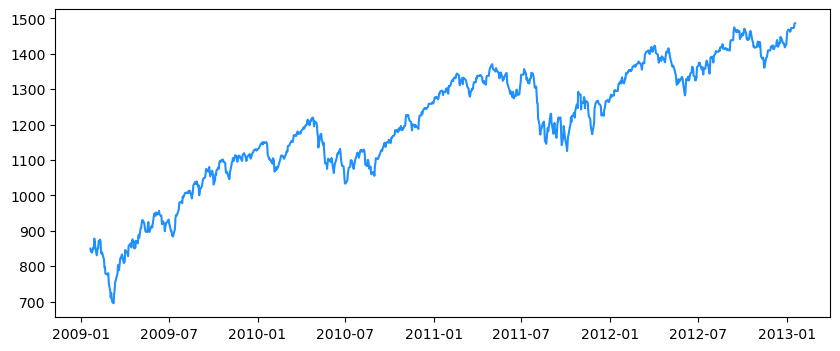

In [15]:
fig = plt.figure(figsize=(10,4))
plt.plot(df_obama['Date'], df_obama['Index'], color='dodgerblue')
plt.show()

## Assigning Labels

In addition to the column for presidents above, we may also be interested in their political party. The following dictionary links each president with their political party: 

In [16]:
parties = {'Calvin Coolidge':'Republican',
           'Herbert Hoover':'Republican',
           'Franklin Roosevelt':'Democrat',
           'Harry Truman':'Democrat',
           'Dwight Eisenhower':'Republican',
           'John Kennedy':'Democrat',
           'Lyndon Johnson':'Democrat',
           'Richard Nixon':'Republican',
           'Gerald Ford':'Republican',
           'Jimmy Carter':'Democrat',
           'Ronald Reagan':'Republican',
           'George H. W. Bush':'Republican',
           'Bill Clinton':'Democrat',
           'George W. Bush':'Republican',
           'Barack Obama':'Democrat',
           'Donald Trump':'Republican',
           'Joe Biden':'Democrat'}
presidents = list(parties.keys())

We can generate a new column in our dataframe which lists the part in power for each day:

In [17]:
df['Party'] = 'None'

In [18]:
# loop through each president and assign party keys in the dataframe
for president in presidents:
    df.loc[df['President'].str.contains(president), 'Party'] = parties[president]

In [19]:
df.head()

,Date,Index,President,Party
0,1927-12-30,17.660000,Calvin Coolidge 1,Republican
1,1928-01-03,17.760000,Calvin Coolidge 1,Republican
2,1928-01-04,17.719999,Calvin Coolidge 1,Republican
3,1928-01-05,17.549999,Calvin Coolidge 1,Republican
4,1928-01-06,17.660000,Calvin Coolidge 1,Republican


In [20]:
df.tail()

,Date,Index,President,Party
24435,2025-04-10,5268.05,Donald Trump 2,Republican
24436,2025-04-11,5363.36,Donald Trump 2,Republican
24437,2025-04-14,5405.97,Donald Trump 2,Republican
24438,2025-04-15,5396.63,Donald Trump 2,Republican
24439,2025-04-16,5275.70,Donald Trump 2,Republican


Using the assignment above, we can identify components of the S&P 500 index time series that correspond to each part:

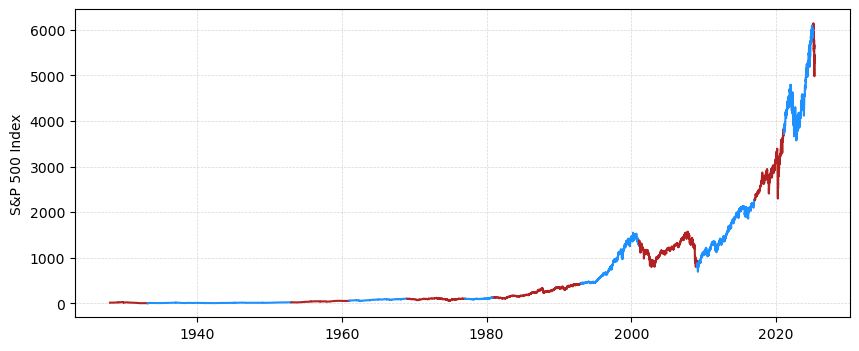

In [21]:
fig = plt.figure(figsize=(10,4))

for president in presidents:
    for term in [1, 2, 3, 4]:
        df_sub = df[df['President']==president+' '+str(term)]
        
        if len(df_sub)>0:
            if df_sub['Party'].iloc[0]=='Republican':
                color = 'firebrick'
            if df_sub['Party'].iloc[0]=='Democrat':
                color = 'dodgerblue'
            plt.plot(df_sub['Date'],df_sub['Index'], color=color)
  
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)
plt.ylabel('S&P 500 Index')
plt.show()

It's a little hard to see in this plot how much the market grew or shrank. Let's make the plot reflect the days since teh start of the term:

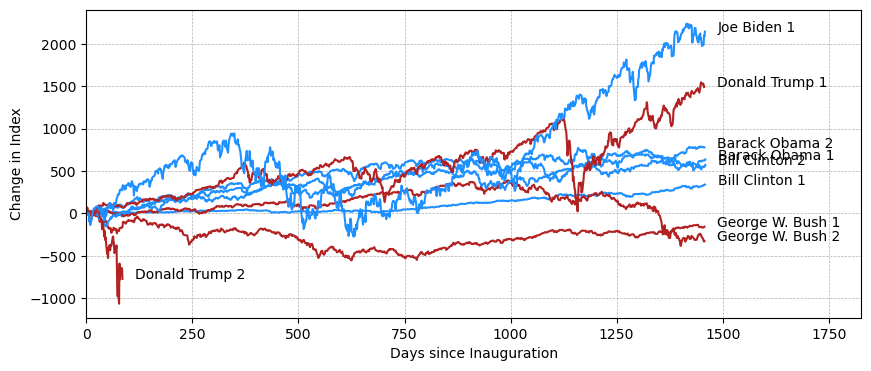

In [22]:
presidents = ['Bill Clinton 1','Bill Clinton 2',
              'George W. Bush 1', 'George W. Bush 2',
              'Barack Obama 1', 'Barack Obama 2',
              'Donald Trump 1', 'Donald Trump 2', 'Joe Biden 1']

fig = plt.figure(figsize=(10,4))

for president in presidents:
    df_sub = df[df['President']==president]
    if df_sub['Party'].iloc[0]=='Republican':
        color = 'firebrick'
    if df_sub['Party'].iloc[0]=='Democrat':
        color = 'dodgerblue'
        
    # create time and date variables with the first
    # value removed
    days_in_term = df_sub['Date']-df_sub['Date'].iloc[0]
    index_change = df_sub['Index']-df_sub['Index'].iloc[0]
    
    # convert the time to days
    days_in_term = days_in_term.dt.days
    
    # plto the line
    plt.plot(days_in_term, index_change, color=color)
    
    # add a label to the end
    plt.text(days_in_term.iloc[-1]+30, index_change.iloc[-1], president)

# format the axes
plt.grid(linewidth=0.5, linestyle='--')
plt.xlim([0, 365*5+2])

plt.xlabel('Days since Inauguration')
plt.ylabel('Change in Index')
plt.show()

### &#x1F914; Mini-Exercise
Revise the plot above to compare the percentage increase in the index growth since the start of the administration.

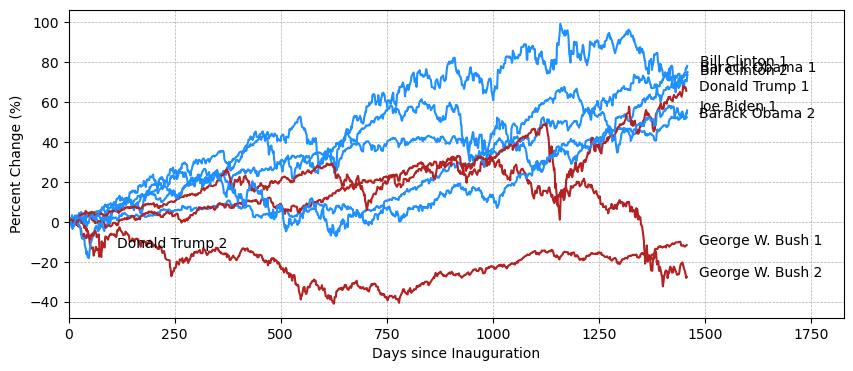

In [23]:
fig = plt.figure(figsize=(10,4))

for president in presidents:
    
    # make a subset data frame
    df_sub = df[df['President']==president]
    if df_sub['Party'].iloc[0]=='Republican':
        color = 'firebrick'
    if df_sub['Party'].iloc[0]=='Democrat':
        color = 'dodgerblue'
        
    # create time and date variables with the first
    # value removed
    days_in_term = df_sub['Date']-df_sub['Date'].iloc[0]
    index_change = df_sub['Index']-df_sub['Index'].iloc[0]
    
    # convert the time to days
    days_in_term = days_in_term.dt.days
    
    # create a variable for the percent change
    percent_change = 100*index_change/df_sub['Index'].iloc[0]
    
    # plot the line and add a label
    plt.plot(days_in_term, percent_change, color=color)
    plt.text(days_in_term.iloc[-1]+30, percent_change.iloc[-1], president)

# format the axes
plt.grid(linewidth=0.5, linestyle='--')
plt.xlim([0, 365*5+2])
plt.xlabel('Days since Inauguration')
plt.ylabel('Percent Change (%)')
plt.show()